# Titanic_EDA_Student TRISHALA

# importing important libraries 

In [2]:
#linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns

sns.set()
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style



# data collection

In [3]:
data_df = pd.read_csv("TITANIC.csv")
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning data

In [5]:
data_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Morley, Mr. William",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


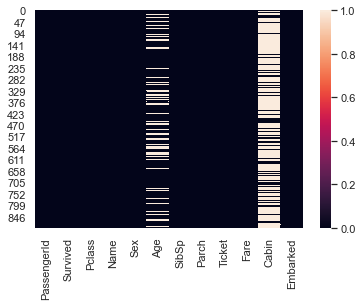

In [6]:
sns.heatmap(data_df.isnull())
plt.show()

the white spaces shows the blank values in age and cabin column

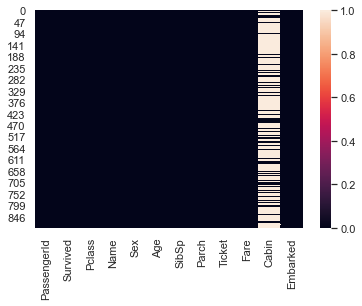

In [7]:
#cleaning age null values
def impute_age(cols):  #col1=age  col2=pclass
        Age=cols[0]
        Pclass=cols[1]

        if pd.isnull(Age):

                if Pclass==1:
                        return 37
                elif Pclass==2:
                        return 29
                else:
                        return 24
        else:
                return Age
data_df['Age']=data_df[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(data_df.isnull())
plt.show()

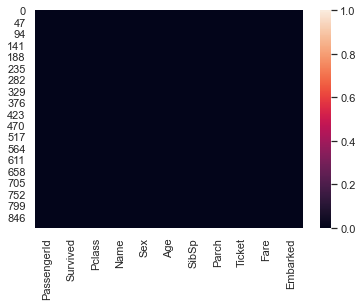

In [8]:
#cleaning cabin null values
data_df.drop('Cabin',axis=1,inplace=True)
sns.heatmap(data_df.isnull())
plt.show()


# # after cleaning

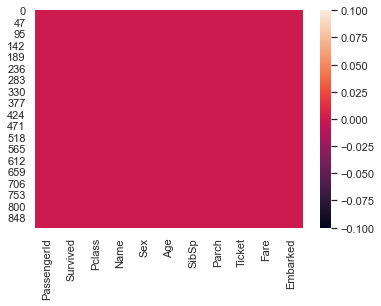

In [9]:
data_df.dropna(inplace=True)
sns.heatmap(data_df.isnull())
plt.show()

# Exploratory data analysis(EDA)

In [10]:
#get a list of the features within the dataset
print(data_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


## sex

Percentage of females who survived: 74.03846153846155
Percentage of males who survived: 18.890814558058924


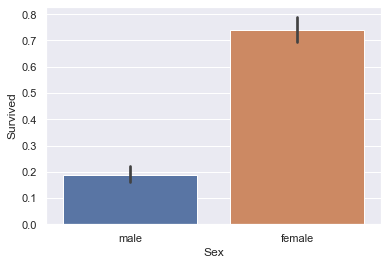

In [11]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=data_df)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data_df["Survived"][data_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data_df["Survived"][data_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

it is observed that survival rate of female is more than male.

# # Age

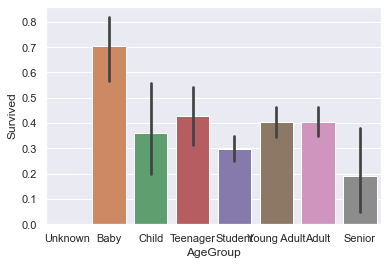

In [14]:
#sort the ages into logical categories
data_df["Age"] = data_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data_df['AgeGroup'] = pd.cut(data_df["Age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=data_df)
plt.show()

# # combining age and sex

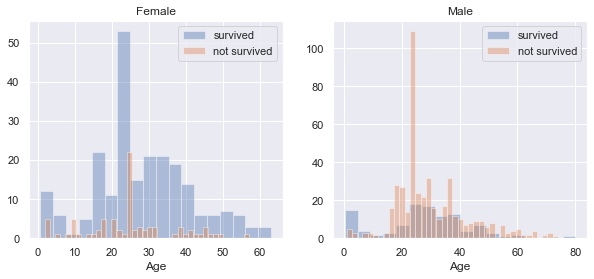

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data_df[data_df['Sex']=='female']
men = data_df[data_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## Pclass

Percentage of Pclass = 1 who survived: 62.616822429906534
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


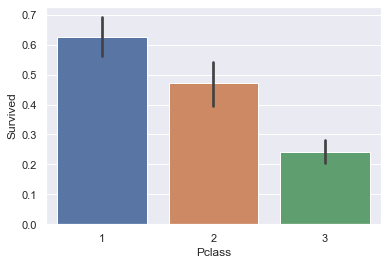

In [16]:
sns.barplot(x='Pclass', y='Survived', data=data_df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", data_df["Survived"][data_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", data_df["Survived"][data_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", data_df["Survived"][data_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)


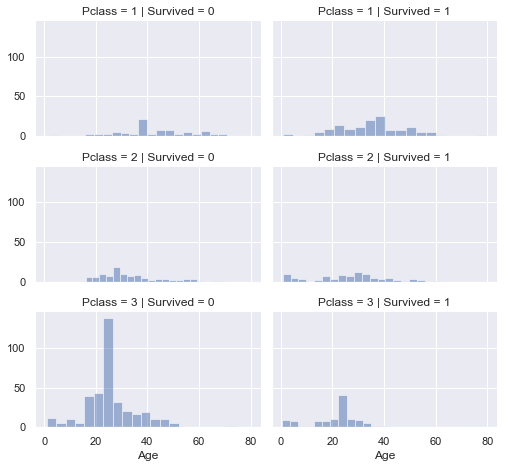

In [17]:
grid = sns.FacetGrid(data_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## sibsp

Percentage of SibSp = 0 who survived: 34.32343234323432
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


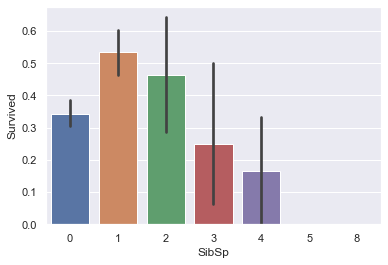

In [18]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=data_df)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", data_df["Survived"][data_df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", data_df["Survived"][data_df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", data_df["Survived"][data_df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

# # parch

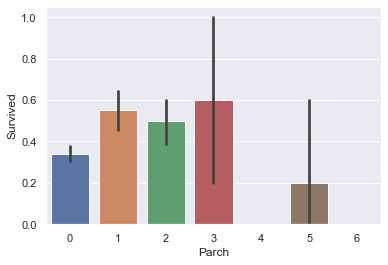

In [19]:
sns.barplot(x="Parch", y="Survived", data=data_df)
plt.show()

# # combining sibsp and parch

In [20]:
data = [data_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
data_df['not_alone'].value_counts()

1    535
0    354
Name: not_alone, dtype: int64

C:\Users\trish\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


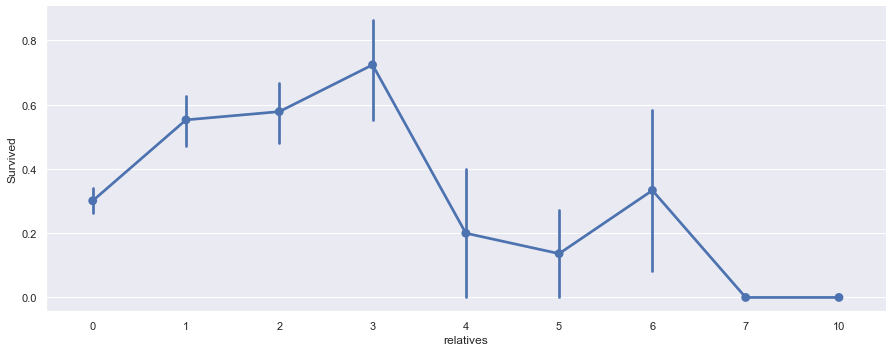

In [21]:
axes = sns.factorplot('relatives','Survived', 
                      data=data_df, aspect = 2.5, )

# # Embarked

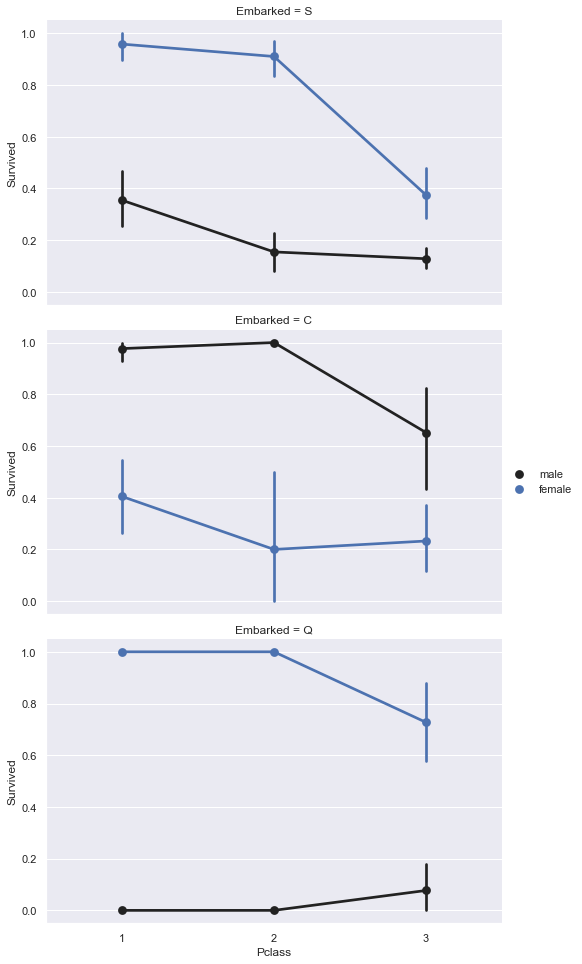

In [22]:
FacetGrid = sns.FacetGrid(data_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [23]:
#convering agegroup string values to number
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
data_df['AgeGroup'] = data_df['AgeGroup'].map(age_mapping)


data_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,6.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,5.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5.0,0,1


In [24]:
#removing dummies values
sex=pd.get_dummies(data_df['Sex'],drop_first=True)
print(sex)

embark=pd.get_dummies(data_df['Embarked'],drop_first=True)
print(embark)
data_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]
     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]


In [25]:
data_df = data_df.drop(['Age'], axis = 1)

In [27]:
data_df=pd.concat([data_df,sex,embark],axis=1)
print(data_df)

     PassengerId  Survived  Pclass  SibSp  Parch     Fare  AgeGroup  \
0              1         0       3      1      0   7.2500       4.0   
1              2         1       1      1      0  71.2833       6.0   
2              3         1       3      0      0   7.9250       5.0   
3              4         1       1      1      0  53.1000       5.0   
4              5         0       3      0      0   8.0500       5.0   
..           ...       ...     ...    ...    ...      ...       ...   
886          887         0       2      0      0  13.0000       5.0   
887          888         1       1      0      0  30.0000       4.0   
888          889         0       3      1      2  23.4500       4.0   
889          890         1       1      0      0  30.0000       5.0   
890          891         0       3      0      0   7.7500       5.0   

     relatives  not_alone  male  Q  S  male  Q  S  
0            1          0     1  0  1     1  0  1  
1            1          0     0  0  0     0

# Testing Different Models


I will be testing the following models with my training data:

1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Perceptron
5. Decision Tree Classifier
6. Random Forest Classifier
7. KNN or k-Nearest Neighbors
8. Stochastic Gradient Descent
9. Gradient Boosting Classifier
For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

# # splitting data

In [29]:
from sklearn.model_selection import train_test_split

predictors = data_df.drop(['Survived', 'PassengerId'], axis=1)
target = data_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [30]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

67.86


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

74.49


C:\Users\trish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

64.8


In [33]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

73.47


C:\Users\trish\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

60.71


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

73.98


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

75.51


In [37]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

69.9


In [38]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

52.04


In [39]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

76.02


# #Comparing all models

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,76.02
3,Random Forest,75.51
2,Logistic Regression,74.49
7,Decision Tree,73.98
6,Linear SVC,73.47
1,KNN,69.90
4,Naive Bayes,67.86
0,Support Vector Machines,64.80
5,Perceptron,60.71
8,Stochastic Gradient Descent,52.04


I decided to use the Gradient Boosting Classifier as best model for the testing data.